In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/the-office-dataset/the_office_series.csv
/kaggle/input/the-office-episodes-data/office_episodes.csv


In [2]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('../input/the-office-episodes-data/office_episodes.csv')
df.head()

,episode_number,season,episode_title,description,ratings,votes,viewership_mil,duration,release_date,guest_stars,director,writers,has_guests,scaled_ratings
0,0,1,Pilot,The premiere episode introduces the boss and s...,7.5,4936,11.2,23,2005-03-24,NaN,Ken Kwapis,Ricky Gervais |Stephen Merchant and Greg Daniels,False,0.28125
1,1,1,Diversity Day,Michael's off color remark puts a sensitivity ...,8.3,4801,6.0,23,2005-03-29,NaN,Ken Kwapis,B. J. Novak,False,0.53125
2,2,1,Health Care,Michael leaves Dwight in charge of picking the...,7.8,4024,5.8,22,2005-04-05,NaN,Ken Whittingham,Paul Lieberstein,False,0.37500
3,3,1,The Alliance,"Just for a laugh, Jim agrees to an alliance wi...",8.1,3915,5.4,23,2005-04-12,NaN,Bryan Gordon,Michael Schur,False,0.46875
4,4,1,Basketball,Michael and his staff challenge the warehouse ...,8.4,4294,5.0,23,2005-04-19,NaN,Greg Daniels,Greg Daniels,False,0.56250


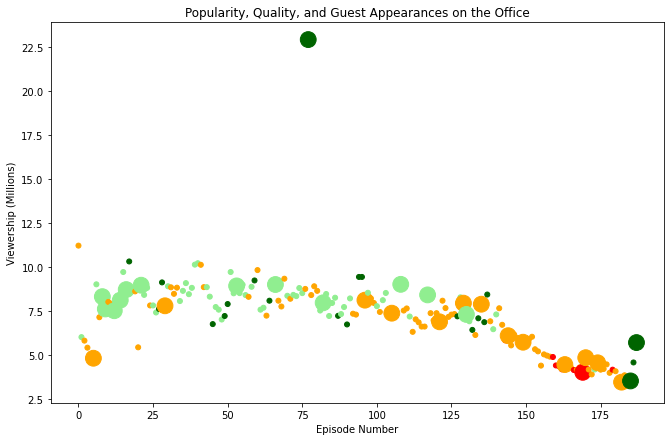

In [3]:
# Popularity, quality, and guest apperance scatter plot of The Office
x = df['episode_number']
y = df['viewership_mil']
colors = []
for rating in df['scaled_ratings']: # Color scheming based on scaled ratings
    if rating < 0.25:
        colors.append('red')
    elif rating >= 0.75:
        colors.append('darkgreen')
    elif rating >= 0.50 and rating < 0.75:
        colors.append('lightgreen')
    else:
        colors.append('orange')

# With sizing system based on guest appearance
size = [250 if guest == True else 25 for guest in df['has_guests']]
        
fig = plt.figure(figsize=[11, 7])
plt.scatter(x, y, c=colors, s=size)
plt.xlabel('Episode Number')
plt.ylabel('Viewership (Millions)')
plt.title('Popularity, Quality, and Guest Appearances on the Office')
plt.show()

In [4]:
# Most watched episode's guest stars
df[df['viewership_mil'] == df['viewership_mil'].max()]['guest_stars']

77    Cloris Leachman, Jack Black, Jessica Alba
Name: guest_stars, dtype: object

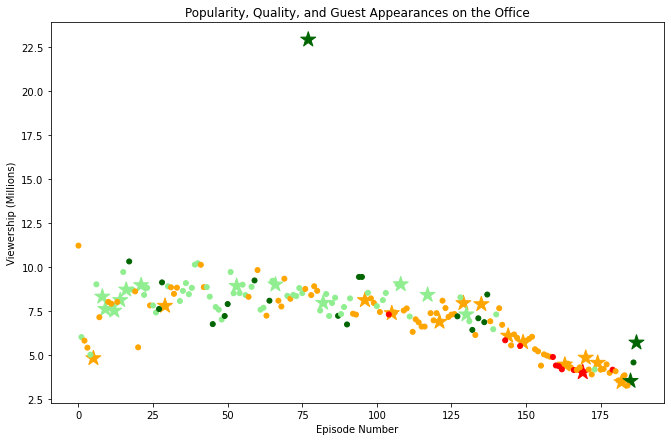

In [5]:
# Bonus Step! Using markers to differentiate episodes with guest stars

cols = []
for rating in df['scaled_ratings']: # Color scheming based on scaled ratings
    if rating < 0.25:
        cols.append('red')
    elif rating >= 0.75:
        cols.append('darkgreen')
    elif rating >= 0.50 and rating < 0.75:
        cols.append('lightgreen')
    else:
        cols.append('orange')
        
df['colors'] = cols
        
guest_df = df[df['has_guests'] == True]
non_guest_df = df[df['has_guests'] == False]

fig = plt.figure(figsize=[11, 7])
plt.scatter(guest_df['episode_number'], guest_df['viewership_mil'], c=guest_df['colors'], s=250, marker='*')
plt.scatter(non_guest_df['episode_number'], non_guest_df['viewership_mil'], c=non_guest_df['colors'], s=25)
plt.xlabel('Episode Number')
plt.ylabel('Viewership (Millions)')
plt.title('Popularity, Quality, and Guest Appearances on the Office')
plt.show()

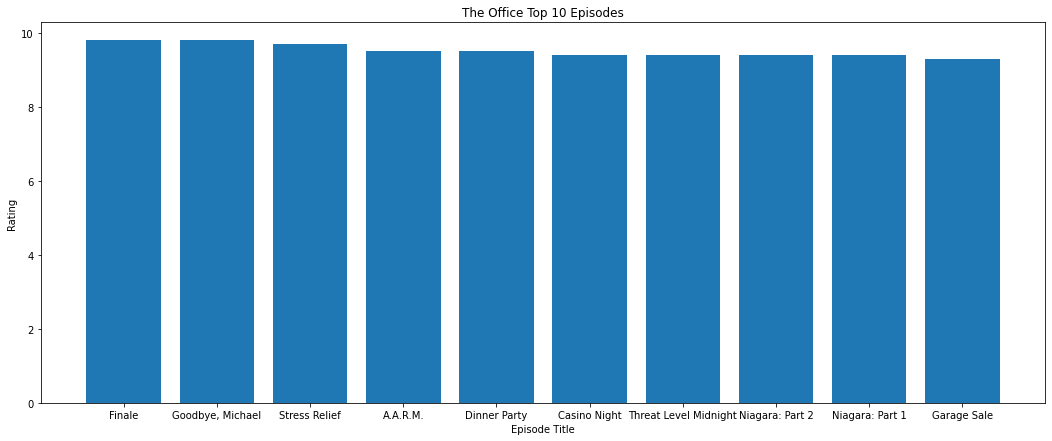

In [6]:
# How are top episodes' ratings compared to each other?

top_episodes = df.sort_values(['ratings'], ascending=False).head(10)

fig = plt.figure(figsize=[18,7])
ax = fig.add_subplot()
ax.bar(top_episodes['episode_title'], top_episodes['ratings'])
ax.set_xlabel('Episode Title')
ax.set_ylabel('Rating')
ax.set_title('The Office Top 10 Episodes')
plt.show()

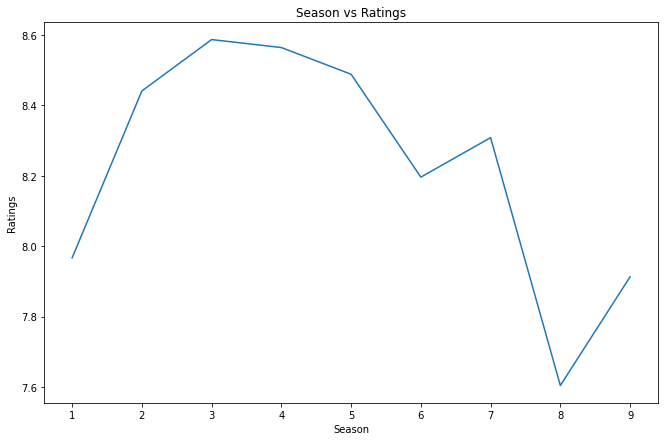

In [7]:
# Average ratings vs Seasons

avg_ratings = df.groupby(['season'])['ratings'].mean()

fig,ax = plt.subplots(figsize=[11,7])
ax.plot(avg_ratings.index, avg_ratings)
ax.set_xlabel('Season')
ax.set_ylabel('Ratings')
ax.set_title('Season vs Ratings')
plt.show()